In [1]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load images + labels, Transpose them so that they appear in the ususal way (liver on left side) 

In [27]:
img_t1 = nb.load('19t1_vibe_fs_tra_KM.nii').get_data()
img_adc = nb.load('07ep2d_diff_b50_300_600_NEU_ADC.nii').get_data()
img_adc_registered = nb.load('Registered_ADC_to_T1.nii').get_data()

label_liver = nb.load('Registered_ADC_to_T1-tissue-label.nii').get_data()
label_lesion = nb.load('Registered_ADC_to_T1-lesion-label.nii').get_data()


img_t1 = np.transpose(img_t1,axes=(1,0,2))
img_adc = np.transpose(img_adc,axes=(1,0,2))
img_adc_registered = np.transpose(img_adc_registered,axes=(1,0,2))
label_liver = np.transpose(label_liver,axes=(1,0,2))
label_lesion = np.transpose(label_lesion,axes=(1,0,2))




Plot a few images

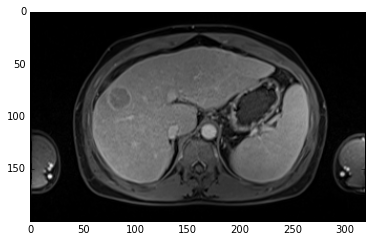

In [24]:
plt.imshow(img_t1[:,:,35],cmap='gray')

ADC image before registration

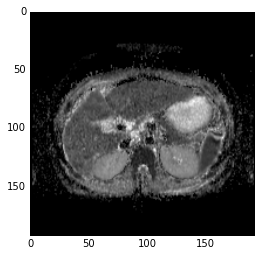

In [7]:
plt.imshow(img_adc[:,:,15],cmap='gray')

ADC image after registration

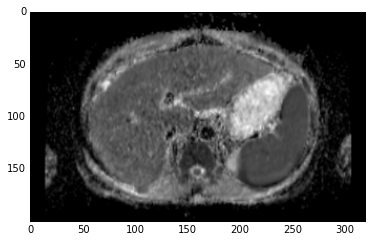

In [14]:
plt.imshow(img_adc_registered[:,:,35],cmap='gray')

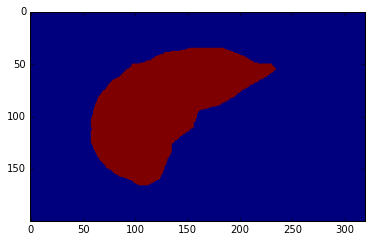

In [28]:
plt.imshow(label_liver[:,:,35])

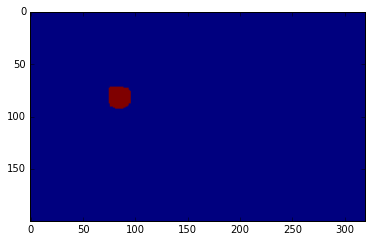

In [29]:
plt.imshow(label_lesion[:,:,35])

In [ ]:
Plot histogram of ADC Values over Lesion 

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.56042756e-05,   3.12085511e-05,
          9.36256534e-05,   4.68128267e-05,   1.87251307e-04,
          1.87251307e-04,   4.21315440e-04,   3.58898338e-04,
          5.46149645e-04,   9.51860810e-04,   9.67465085e-04,
          1.74767886e-03,   2.73074823e-03,   2.93360381e-03,
          3.99469455e-03,   4.02590310e-03,   2.82437388e-03,
          1.96613872e-03,   1.41998908e-03,   1.09229929e-03,
          6.08566747e-04,   5.30545369e-04,   4.05711165e-04,
          2.34064134e-04,   6.24171023e-05,   4.68128267e-05,
          3.12085511e-05,   1.56042756e-05,   6.24171023e-05,
        

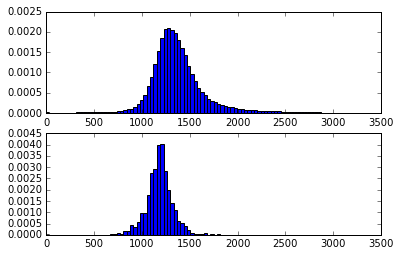

In [75]:
slicedliver = np.multiply(img_adc_registered,label_liver).flatten()
#note that label value of 2 corresponds to lesion
slicedlesion = np.multiply(img_adc_registered,label_lesion==2).flatten()

#remove all 0
slicedliver = slicedliver[slicedliver!=0]
slicedlesion = slicedlesion[slicedlesion!=0]

plt.subplot(211)
plt.hist(slicedliver,bins=100,range=(0,3500),normed=True)
plt.subplot(212)
plt.hist(slicedlesion,bins=100,range=(0,3500),normed=True)


Integrate ADC values over lesion

In [73]:
print np.sum(slicedlesion)

2159263.5


In [77]:
np.tile?